In [13]:
# ライブラリ
import time

import torch
import torchvision
import numpy
from torchvision import transforms
from torch import optim, nn
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn.functional as F
from torch.utils.data import DataLoader


## Pooling Layer

### Pooling Layerの実装

In [11]:
def max_pooling(X, kernel_size=2, stride=2):
    # 2つのfor文が必要 -> 行と列
    X_h, X_w = X.shape
    # output_dataで全体
    output_data = []
    
    for i in range(0, X_h - kernel_size + 1 , stride):
        # 各行のPooling Layerの結果リスト
        row = []
        for j in range(0, X_w - kernel_size + 1, stride):
            row.append(X[i:i+kernel_size, j:j + kernel_size].max().item())
        output_data.append(row)

    # output_dataは2重のリスト -> tensorで返す
    return torch.tensor(output_data)

In [4]:
list(range(0, 10, 2))

[0, 2, 4, 6, 8]

In [7]:
X = torch.randn(10, 10)
X

tensor([[ 9.1882e-03,  1.2648e+00, -8.9548e-02,  1.5777e-01,  3.6658e-01,
         -1.4760e+00, -4.1927e-01, -1.5019e+00,  7.3932e-01, -1.9316e+00],
        [-3.0236e-01,  6.8257e-01,  1.2812e+00,  1.5360e+00, -1.8397e+00,
         -1.4720e+00, -1.1495e+00, -6.0637e-01,  1.0009e+00,  5.6880e-01],
        [ 4.2695e-01,  1.1521e+00,  1.1153e+00,  1.2723e+00,  4.6337e-01,
         -8.8391e-01, -5.9059e-01,  4.9275e-01,  3.7180e-01,  8.9132e-01],
        [-8.5886e-01,  8.1191e-01,  2.2431e-01, -6.1972e-01,  2.3964e+00,
         -6.0985e-01,  7.7234e-01,  8.8816e-01,  1.2133e+00,  1.9372e+00],
        [-5.2708e-01,  1.0526e+00,  6.4253e-01, -6.9700e-01, -1.8623e-01,
          1.6916e+00, -2.0841e-01,  1.0645e-01, -9.1570e-01,  1.6907e+00],
        [-6.1019e-01,  2.7628e-01,  6.6511e-01, -9.6864e-02,  1.4281e+00,
          9.6458e-02, -3.8315e-01, -2.9375e-01,  4.0688e-01, -7.9941e-01],
        [ 1.3277e+00,  3.1105e-03, -2.1702e+00, -1.2622e+00, -8.7651e-01,
         -2.0181e-01,  2.0125e+0

In [10]:
X[2:2+2, 2:2+2].max().item()

1.2722848653793335

In [ ]:
### 自作したPooling層を使ってみる

In [27]:
# 実際のデータでやってみる

# データ準備

# PIL -> tensor, 正規化
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST('./mnist_data', train=True, download=True,transform=transform )
val_dataset = torchvision.datasets.MNIST('./mnist_data', train=False, download=True, transform=transform)

# dataloader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, num_workers=4)



In [28]:
X, y = train_dataset[0]
X.shape

torch.Size([1, 28, 28])

In [29]:
# 今回は、Xがrank2を想定しているから後半2つを取る
X_ = X[0, :, :]
max_out = max_pooling(X_)
max_out.shape

torch.Size([14, 14])

In [30]:
max_out

tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.8588, -0.8588,
          0.0667,  0.3725,  1.0000,  0.9373, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -0.6157,  0.9843,  0.9843,  0.9843,  0.9843,
          0.9843,  0.7647,  0.9843,  0.5294, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -0.8588,  0.9843,  0.9843,  0.9843,  0.5529,
          0.9373, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -0.8902,  0.2078,  0.9843, -0.9843,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9137,  0.9843,  0.7647,
         -0.1529, -1.0000, -1.0000, -1.0000, -1.0

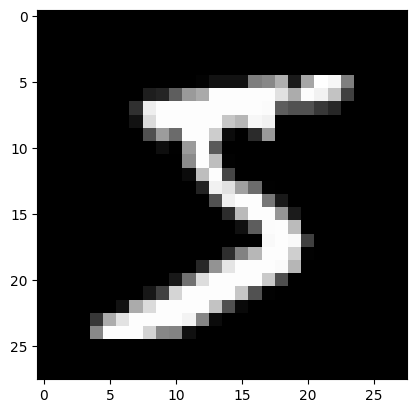

In [32]:
# 縮小した画像を表示してみる
X = X / 2 + 0.5 # -1 ~ 1 -> 0 ~ 1に追加
plt.imshow(X_, cmap='gray')

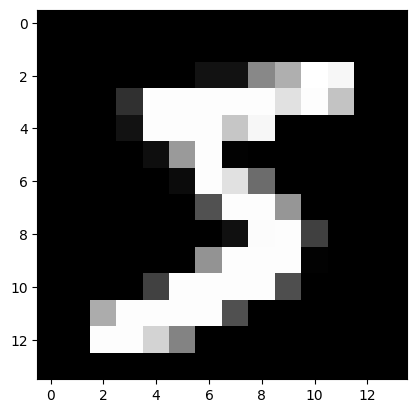

In [33]:
# maxpoolingしたあと
plt.imshow(max_pooling(X_), cmap='gray')

### 実際にConv -> ReLU -> Poolingを試してみる

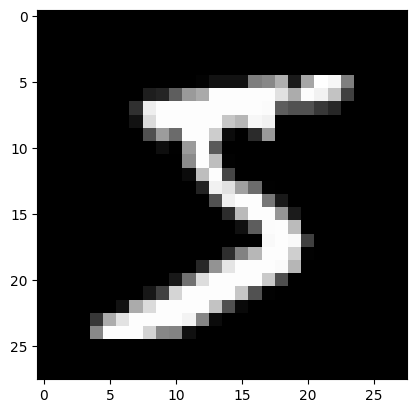

In [41]:
# 最初の画像
plt.imshow(X_, cmap='gray')

In [38]:
# upper edge fileter
top_edge_filter = torch.tensor([[-1, -1, -1], 
                                [0,0,0], 
                                [1,1,1]])




# 関数化
def apply_filter(im, filter):
    # 画像の縦横
    im_h, im_w = im.shape
    # filterの縦横
    f_h, f_w = top_edge_filter.shape
    output_data = []
    for i in range(im_h - f_h + 1):
        row = []
        for j in range(im_w - f_w + 1):
            row.append((im[i:i+f_h, j:j+f_w] * filter).sum().item())
        output_data.append(row)

    return torch.tensor(output_data)



# ReLU
def relu(X):
    return torch.clamp(X, min=0)

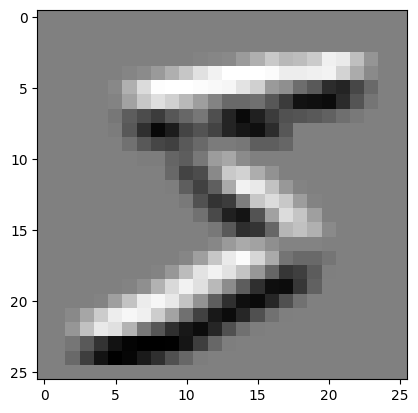

In [36]:
# 畳み込み層を実装した後の画像
conv_out = apply_filter(X_, top_edge_filter)
plt.imshow(conv_out, cmap='gray')

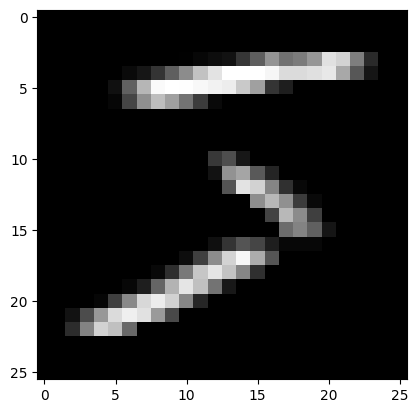

In [39]:
# ReLU層実装
relu_out = relu(conv_out)
plt.imshow(relu_out, cmap='gray')

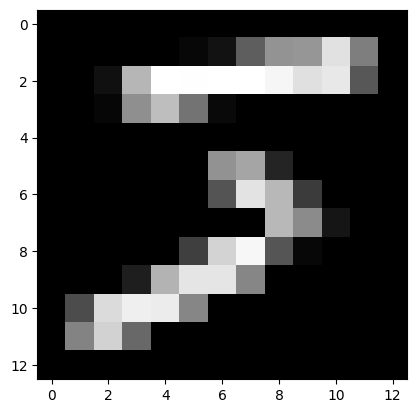

In [40]:
# max Pooling (サイズ削減)
max_out = max_pooling(relu_out)
plt.imshow(max_out, cmap='gray')

### Pytorchのmax pooling Layer

In [60]:
conv_model = nn.Sequential(
    # 1x28x28
    nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    # 4x14x14
    nn.Conv2d(4, 8, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),    

    # 8x7x7
    nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),    

    # 16x3x3
    nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),    

    # 32x1x1
    nn.Conv2d(32, 10, kernel_size=3, stride=1, padding=1),
    # nn.MaxPool2d(2, 2),
    # 10x1x1
    nn.Flatten()
    
    
)

class ConvModel(nn.Module):

    def __init__(self, in_ch):

        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, 4, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(4, 8, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(32, 10, kernel_size=3, stride=1, padding=1)
        self.flatten = nn.Flatten()


    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2)
            
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2)       
        
        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2)        
        
        X = F.relu(self.conv4(X))
        X = F.max_pool2d(X, 2)       
        
        X = F.relu(self.conv5(X))
        X = self.flatten(X)

        return X

In [54]:
X, y = next(iter(train_loader))

In [55]:
X.shape

torch.Size([128, 1, 28, 28])

In [56]:
preds = conv_model(X)

In [57]:
preds.shape

torch.Size([128, 10])

In [59]:
X, y = next(iter(train_loader))

In [61]:
conv_model2 = ConvModel(in_ch=1)

In [62]:
preds = conv_model2(X)

In [63]:
preds

tensor([[0.0000, 0.0275, 0.0601,  ..., 0.0644, 0.0000, 0.0000],
        [0.0003, 0.0297, 0.0632,  ..., 0.0650, 0.0000, 0.0000],
        [0.0000, 0.0292, 0.0618,  ..., 0.0657, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0256, 0.0616,  ..., 0.0641, 0.0000, 0.0000],
        [0.0000, 0.0289, 0.0638,  ..., 0.0652, 0.0000, 0.0000],
        [0.0000, 0.0266, 0.0603,  ..., 0.0620, 0.0000, 0.0000]],
       grad_fn=<ViewBackward0>)

In [64]:
preds.shape

torch.Size([128, 10])